In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [59]:
# Read the dataset
df = pd.read_csv('../dataset/postings.csv')

In [60]:
import re

# Sort only tech companies

# Define a list of programming languages, removing "Go" and ensuring accurate matches
programming_languages = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",
]

# Define additional tech-related keywords
tech_keywords = [
    "data science", "data analytics", 'machine learning', 'deep learning', 'artificial intelligence', "frontend", 'backend', 'git', 'api', 'apis', 'json', 'sdk', 'developer'
]

# Combine programming languages and tech-related keywords
combined_keywords = programming_languages + tech_keywords

# Convert the combined list into a regex pattern ensuring whole-word matches
pattern = r"\b(?:{})\b".format("|".join(combined_keywords))

# Count matches in title and description
df["match_count"] = df["title"].str.count(pattern, flags=re.IGNORECASE).fillna(0) + \
                    df["description"].str.count(pattern, flags=re.IGNORECASE).fillna(0)

# Filter jobs that match at least 2 of the combined keywords
tech_postings = df[df["match_count"] >= 2].drop(columns=["match_count"])

tech_postings.head(20)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
26,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,NaN,NaN,"Denver, CO",76987056.0,273.0,NaN,...,NaN,1.713281e+12,NaN,0,PART_TIME,NaN,NaN,NaN,80202.0,8031.0
36,266825034,Recruitment Design,Software Support Specialist,Are you driven by the thrill of solving proble...,65000.0,YEARLY,"McLean, VA",99212509.0,NaN,NaN,...,NaN,1.712860e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,62500.0,22101.0,51059.0
78,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",NaN,NaN,United States,69611476.0,21.0,NaN,...,NaN,1.713493e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
107,3127577086,Avero Diagnostics,Histologist - HT,JOB SUMMARYThe Histology Technician/Technologi...,NaN,NaN,"Bellingham, WA",1703759.0,3.0,NaN,...,NaN,1.713458e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,98225.0,53073.0
108,3169712432,SysMind,Salesforce Vlocity Developer,Role: Salesforce Vlocity DeveloperLocation: Ne...,NaN,NaN,"Jersey City, NJ",85964.0,146.0,NaN,...,NaN,1.713211e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
113,3196627399,Bellevue Downtown Association,Marketing & Communications – Content Writer In...,Marketing & Communications – Content Writer In...,NaN,HOURLY,"Bellevue, WA",88304.0,2.0,17.0,...,NaN,1.713483e+12,NaN,0,PART_TIME,USD,BASE_SALARY,35360.0,98004.0,53033.0
116,3245063922,Saxon AI,Data Architect,Request: Data ArchitectLocation: San Francisco...,NaN,NaN,"San Francisco, CA",224935.0,7.0,NaN,...,NaN,1.713537e+12,NaN,0,CONTRACT,NaN,NaN,NaN,94101.0,6075.0
117,3251984218,SLS Solutions,SAP BTP,"Strong experience with HANA DB SQL, Stored Pro...",NaN,NaN,United States,30769477.0,89.0,NaN,...,NaN,1.713212e+12,NaN,0,CONTRACT,NaN,NaN,NaN,NaN,NaN
129,3366698309,Webologix Ltd/ INC,Anaplan Developer,Job Title: Anaplan Developer\n\nLocations: US ...,NaN,NaN,United States,14524845.0,2.0,NaN,...,NaN,1.713471e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
146,3475933396,USLI,Senior Developer,This individual will work with a high performa...,NaN,NaN,Greater Philadelphia,33421.0,NaN,NaN,...,NaN,1.713538e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [61]:
print(tech_postings.shape)

(15362, 31)


/var/folders/m7/kgr74ggx1rb3wd3t16w6wdm80000gn/T/ipykernel_26684/1783169596.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Job Postings Count", y="Skill", data=top_20_skills_df, palette="viridis")


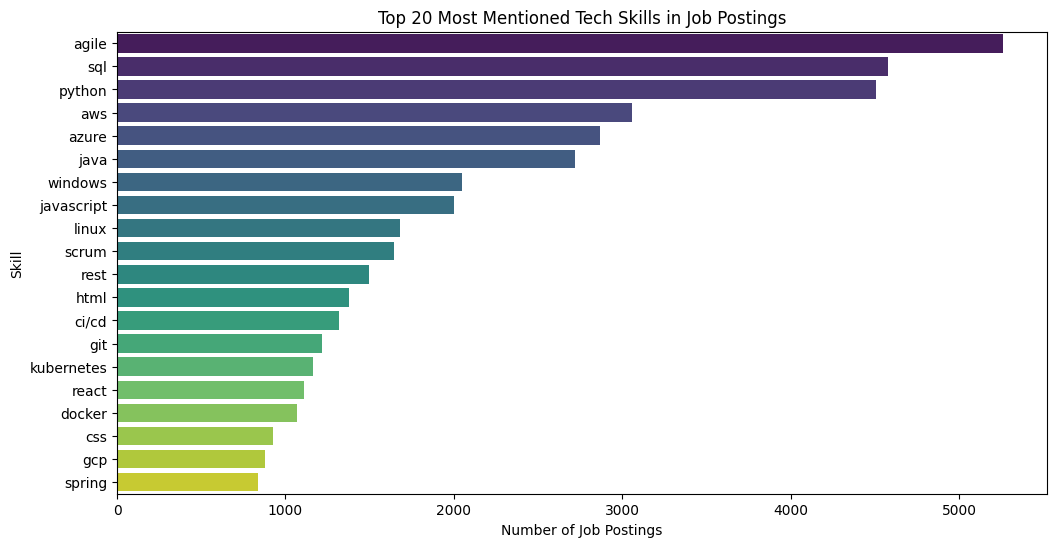

In [62]:
# Define tech keywords list
tech_skills_keywords = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",
]

# Precompile patterns for all skills in one regex (optimized for efficiency)
pattern = re.compile(r"\b(" + "|".join(map(re.escape, tech_skills_keywords)) + r")\b", re.IGNORECASE)

# Count how many job descriptions contain each skill
skill_counts = {skill.lower(): 0 for skill in tech_skills_keywords}

for description in tech_postings["description"].dropna():
    matches = pattern.findall(description)  # Find all matches at once
    for match in set(matches):  # Count each skill only once per description
        skill_counts[match.lower()] += 1  # Convert match to lowercase to avoid duplication issues

# Convert skill counts to a DataFrame
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=["Skill", "Job Postings Count"])


# Sort and select top 20 most common skills
top_20_skills_df = skill_counts_df.sort_values(by="Job Postings Count", ascending=False).head(20)



# Display the table
# print(top_20_skills_df)
plt.figure(figsize=(12, 6))
sns.barplot(x="Job Postings Count", y="Skill", data=top_20_skills_df, palette="viridis")
plt.xlabel("Number of Job Postings")
plt.ylabel("Skill")
plt.title("Top 20 Most Mentioned Tech Skills in Job Postings")
plt.show()